In [1]:
import tensorflow as tf
from tensorflow import keras

import os
from os import path

import tempfile
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
pd.options.mode.chained_assignment = None

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import sklearn

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-bccbdw33 because the default path (/home/juliuswa/installed/apache-tomcat-9.0.30/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
df_name = "95"

data_path = "../../RoboDocData"
df_path = f"{data_path}/{df_name}"

df = pd.read_pickle(f"{df_path}/dataframe_{df_name}.pkl")

In [3]:
with open(f"{data_path}/disease_matrix_raw.npy", 'rb') as f:
    disease_matrix_raw = np.load(f)

with open(f"{data_path}/symptoms_dict.npy", 'rb') as f:
    symptoms_dict = np.load(f)

with open(f"{data_path}/patient_history_dict.npy", 'rb') as f:
    patient_history_dict = np.load(f)

with open(f"{data_path}/diagnoses_dict.npy", 'rb') as f:
    diagnoses_dict = np.load(f) 

In [4]:
df.head()

,age,gender,weight,height,heartrate_mean,heartrate_min,heartrate_max,meanbp_mean,meanbp_min,meanbp_max,...,1431,1432,1433,1434,1435,1436,1437,length_of_stay_hospital,days_to_death,died_in_hospital
0,-0.314227,0.882781,0.709301,5.792595e-01,-1.494342,-1.465284,-1.130373,0.793605,-0.182336,1.786196,...,-0.325315,0.338638,-1.311366,0.688960,0.077232,-0.073634,-0.029856,10.61,95.0,0
1,0.435565,0.882781,0.478289,5.792595e-01,-0.465844,-0.262882,-0.790772,-0.181336,0.478330,-0.339928,...,0.121791,0.036300,0.125635,0.122869,0.135796,0.025071,0.117645,6.33,NaN,0
2,0.608594,-1.132784,-0.815376,-1.125754e+00,0.112687,0.338319,-0.499686,-0.092705,-0.035521,-0.223958,...,0.879756,0.040327,0.605153,-0.597103,0.314791,-0.406310,0.927886,15.08,23.0,0
3,-0.487256,-1.132784,-0.122341,-7.847512e-01,1.141184,1.273521,0.373572,-0.801754,-0.108928,-0.378585,...,0.055464,-0.013563,0.425975,-0.051111,-0.408861,0.038872,0.121768,2.73,2.0,1
4,0.839300,0.882781,1.725752,-1.308840e-17,-1.237217,-1.264884,-1.178887,-1.333540,-1.430261,-1.035750,...,1.733591,0.570992,-1.950549,0.177128,1.541920,-1.497021,0.692167,2.79,489.0,0


In [5]:
from sklearn.cluster import KMeans, DBSCAN, spectral_clustering

t_start = time.time()
clustering = KMeans(n_clusters=2).fit(np.array([df[0], df[1], df[2]]).T)
t_end = time.time()

cluster_labels = clustering.labels_

print(f"Time elapsed: {(t_end - t_start) / 60:.2f} minutes")
print(cluster_labels[:20])


Time elapsed: 0.02 minutes
[1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [6]:
df["cluster"] = cluster_labels

In [7]:
df.head()

,age,gender,weight,height,heartrate_mean,heartrate_min,heartrate_max,meanbp_mean,meanbp_min,meanbp_max,...,1432,1433,1434,1435,1436,1437,length_of_stay_hospital,days_to_death,died_in_hospital,cluster
0,-0.314227,0.882781,0.709301,5.792595e-01,-1.494342,-1.465284,-1.130373,0.793605,-0.182336,1.786196,...,0.338638,-1.311366,0.688960,0.077232,-0.073634,-0.029856,10.61,95.0,0,1
1,0.435565,0.882781,0.478289,5.792595e-01,-0.465844,-0.262882,-0.790772,-0.181336,0.478330,-0.339928,...,0.036300,0.125635,0.122869,0.135796,0.025071,0.117645,6.33,NaN,0,1
2,0.608594,-1.132784,-0.815376,-1.125754e+00,0.112687,0.338319,-0.499686,-0.092705,-0.035521,-0.223958,...,0.040327,0.605153,-0.597103,0.314791,-0.406310,0.927886,15.08,23.0,0,0
3,-0.487256,-1.132784,-0.122341,-7.847512e-01,1.141184,1.273521,0.373572,-0.801754,-0.108928,-0.378585,...,-0.013563,0.425975,-0.051111,-0.408861,0.038872,0.121768,2.73,2.0,1,0
4,0.839300,0.882781,1.725752,-1.308840e-17,-1.237217,-1.264884,-1.178887,-1.333540,-1.430261,-1.035750,...,0.570992,-1.950549,0.177128,1.541920,-1.497021,0.692167,2.79,489.0,0,0


<IPython.core.display.Javascript object>


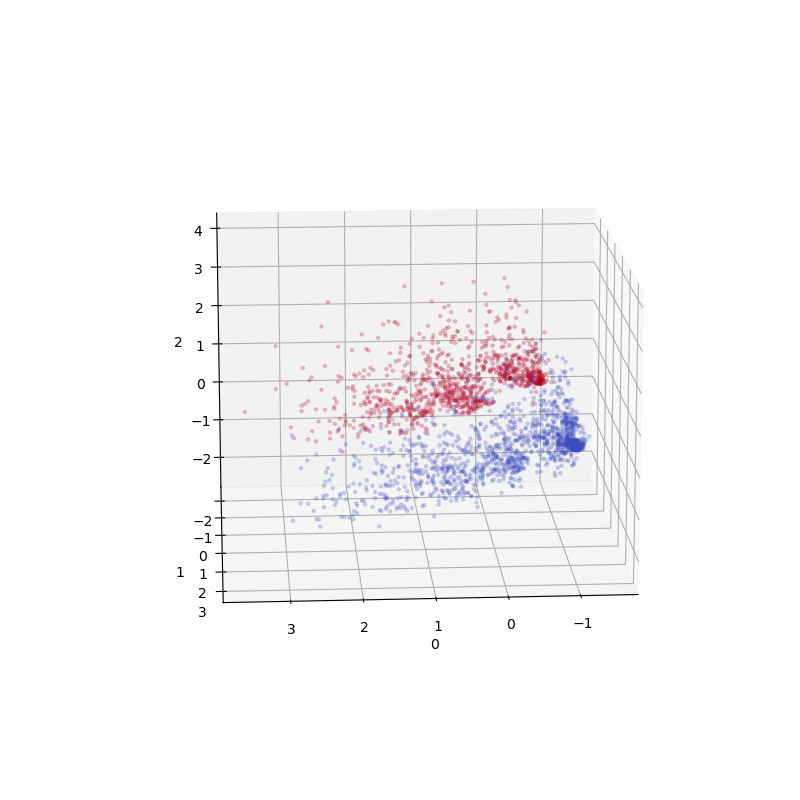

In [8]:
import matplotlib.cm as cm
%matplotlib notebook

rd_df = df[::20]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("0")
ax.set_ylabel("1")
ax.set_zlabel("2")

ax.scatter(rd_df[0], rd_df[1], rd_df[2], alpha=0.2, c=rd_df.cluster, marker=".", cmap=cm.coolwarm)


plt.show()

In [10]:
M0 = disease_matrix_raw[df.cluster == 0]
M1 = disease_matrix_raw[df.cluster == 1]

In [43]:
def index_to_name(i: int):
    lenS = len(symptoms_dict)
    lenPH = len(patient_history_dict)
    lenD = len(diagnoses_dict)

    if i < lenS:
        return f"Symptom: {symptoms_dict[i][1]}"
    elif (i > lenS) & (i < lenS + lenPH):
        return f"History: {patient_history_dict[i - lenS][1]}"
    elif i > lenS + lenPH:
        return f"Disease: {diagnoses_dict[i - (lenS + lenPH)][1]}"
    else:
        return "Invalid index"

def index_to_description(i: int):
    lenS = len(symptoms_dict)
    lenPH = len(patient_history_dict)
    lenD = len(diagnoses_dict)

    if i < lenS:
        return f"{symptoms_dict[i][2]}"
    elif (i > lenS) & (i < lenS + lenPH):
        return f"{patient_history_dict[i - lenS][2]}"
    elif i > lenS + lenPH:
        return f"{diagnoses_dict[i - (lenS + lenPH)][2]}"
    else:
        return "Invalid index"

def print_disease_frequency(disease_matrix, n):
    diseases_count = np.sum(disease_matrix, axis=0)
    index_sorted = np.argsort(diseases_count)[::-1]

    for i in range(0, n):
        print(f"#{i+1:03}: {index_to_name(index_sorted[i])}, {int(diseases_count[index_sorted[i]])} times")
        
def print_disease_frequency_ext(disease_matrix, n):
    diseases_count = np.sum(disease_matrix, axis=0)
    index_sorted = np.argsort(diseases_count)[::-1]

    for i in range(0, n):
        print(f"#{i+1:03}: {index_to_name(index_sorted[i])}, {int(diseases_count[index_sorted[i]])} times")
        print(f"\t{index_to_description(index_sorted[i])}")

def print_group_difference(g1_diseases, g2_diseases, g1_label, g2_label, n, lower_bound):
    g1_diseases_count = np.sum(g1_diseases, axis=0)
    g2_diseases_count = np.sum(g2_diseases, axis=0)

    g1_typicalness = np.zeros_like(g1_diseases_count)
    for d in range(len(g1_diseases_count)):
        if g1_diseases_count[d] + g2_diseases_count[d] > lower_bound:
            g1_typicalness[d] = g1_diseases_count[d] / max(g1_diseases_count[d] + g2_diseases_count[d], 1)

    index_sorted = np.argsort(g1_typicalness)[::-1]

    for i in range(0, n):
        print(f"#{i+1:03}: {index_to_name(index_sorted[i])}")
        print(f"\t{index_to_description(index_sorted[i])}")
        print(f"\t{int(g1_diseases_count[index_sorted[i]])} in {g1_label}, {int(g2_diseases_count[index_sorted[i]])} in {g2_label}")
        print(f"\t=> {g1_typicalness[index_sorted[i]]:.2f} of people in {g1_label}")

In [44]:
print_disease_frequency_ext(M0, 20)

#001: Disease: CHF NOS, 8169 times
	"Congestive heart failure
#002: Disease: Atrial fibrillation, 6932 times
	Atrial fibrillation
#003: Disease: Acute kidney failure NOS, 5949 times
	"Acute kidney failure
#004: Disease: Crnry athrscl natve vssl, 5383 times
	Coronary atherosclerosis of native coronary artery
#005: Disease: Acute respiratry failure, 4772 times
	Acute respiratory failure
#006: Disease: DMII wo cmp nt st uncntr, 3815 times
	"Diabetes mellitus without mention of complication
#007: Disease: Urin tract infection NOS, 3774 times
	"Urinary tract infection
#008: Disease: Hy kid NOS w cr kid I-IV, 3351 times
	"Hypertensive chronic kidney disease
#009: Disease: Hyperlipidemia NEC/NOS, 3341 times
	Other and unspecified hyperlipidemia
#010: Disease: Chronic kidney dis NOS, 3149 times
	"Chronic kidney disease
#011: Disease: "Pneumonia, 3024 times
	 organism NOS"
#012: Disease: Anemia NOS, 2951 times
	"Anemia
#013: Disease: Esophageal reflux, 2940 times
	Esophageal reflux
#014: Diseas

In [45]:
print_disease_frequency_ext(M1, 20)

#001: Disease: Hypertension NOS, 20059 times
	Unspecified essential hypertension
#002: Disease: Crnry athrscl natve vssl, 6756 times
	Coronary atherosclerosis of native coronary artery
#003: Disease: Atrial fibrillation, 5701 times
	Atrial fibrillation
#004: Disease: Hyperlipidemia NEC/NOS, 5200 times
	Other and unspecified hyperlipidemia
#005: Disease: DMII wo cmp nt st uncntr, 4979 times
	"Diabetes mellitus without mention of complication
#006: Disease: CHF NOS, 4640 times
	"Congestive heart failure
#007: Disease: Pure hypercholesterolem, 3753 times
	Pure hypercholesterolemia
#008: Disease: Esophageal reflux, 3153 times
	Esophageal reflux
#009: Disease: Acute kidney failure NOS, 3052 times
	"Acute kidney failure
#010: Disease: Urin tract infection NOS, 2683 times
	"Urinary tract infection
#011: Disease: Acute respiratry failure, 2653 times
	Acute respiratory failure
#012: Disease: Anemia NOS, 2366 times
	"Anemia
#013: Disease: Hypothyroidism NOS, 2104 times
	Unspecified acquired hypo

In [48]:
print_group_difference(M0, M1, "M1", "M2", 5, 200)

#001: Disease: Hyp kid NOS w cr kid V
	"Hypertensive chronic kidney disease
	2514 in M1, 14 in M2
	=> 0.99 of people in M1
#002: Disease: Hy kid NOS w cr kid I-IV
	"Hypertensive chronic kidney disease
	3351 in M1, 22 in M2
	=> 0.99 of people in M1
#003: History: Renal dialysis status
	Renal dialysis status
	580 in M1, 7 in M2
	=> 0.99 of people in M1
#004: Disease: End stage renal disease
	End stage renal disease
	1849 in M1, 31 in M2
	=> 0.98 of people in M1
#005: Disease: Chr kidney dis stage III
	"Chronic kidney disease
	714 in M1, 14 in M2
	=> 0.98 of people in M1


In [49]:
print_group_difference(M1, M0, "M2", "M1", 5, 200)

#001: Disease: Hypertension NOS
	Unspecified essential hypertension
	20059 in M2, 2 in M1
	=> 1.00 of people in M2
#002: Disease: Intermed coronary synd
	Intermediate coronary syndrome
	1118 in M2, 510 in M1
	=> 0.69 of people in M2
#003: Disease: Angina pectoris NEC/NOS
	Other and unspecified angina pectoris
	701 in M2, 370 in M1
	=> 0.65 of people in M2
#004: Disease: Pure hypercholesterolem
	Pure hypercholesterolemia
	3753 in M2, 2002 in M1
	=> 0.65 of people in M2
#005: Disease: Intracerebral hemorrhage
	Intracerebral hemorrhage
	841 in M2, 508 in M1
	=> 0.62 of people in M2
